In [1]:
import numpy as np
import control
import matplotlib.pyplot as plt # plotting library
from sympy import symbols
from sympy.physics.control.lti import TransferFunction, Feedback, Series
from sympy.physics.control.control_plots import pole_zero_plot, step_response_plot

# Equations of motion

<img width="15%" src="figures/Quarter_car_model.png" alt="Quarter car"/>

The EOM for $m_1$ is:

$m_1 \ddot{x}_1+c_s \dot{x}_1+k_s x_1 = c_s \dot{x}_2 + k_s x_2$

The EOM for $m_2$ is:

$m_2 \ddot{x}_2+c_s \dot{x}_2+(k_s +k_t) x_2 = c_s \dot{x}_1 + k_s x_1 + k_t y$

# Block diagram

# Transfer Function

## Sympy Implementation

In [10]:
m1, m2, kt, ks, cs, s = symbols('m_1 m_2 k_t k_s c_s s')

# have python perform the block diagram operations symbolically
num1 = cs*s + ks
den1 = m1*s**2 + cs*s + ks
G1 = TransferFunction(num1, den1, s)

num2 = cs*s + ks
den2 = m2*s**2 + cs*s + (ks+kt)
G2 = TransferFunction(num2,den2, s)

num3 = kt
den3 = m2*s**2 + cs*s + (ks+kt)
G3 = TransferFunction(num3,den3, s)

G4 = Feedback(G1,G2,sign=1).doit()
TF = Series(G3,G4).doit()

TF=TF.simplify()
TF

TransferFunction(-k_t*(c_s*s + k_s), (c_s*s + k_s)**2 - (c_s*s + k_s + m_1*s**2)*(c_s*s + k_s + k_t + m_2*s**2), s)

Expanding this TF gives us

In [11]:
TF.expand()

TransferFunction(-c_s*k_t*s - k_s*k_t, -c_s*k_t*s - c_s*m_1*s**3 - c_s*m_2*s**3 - k_s*k_t - k_s*m_1*s**2 - k_s*m_2*s**2 - k_t*m_1*s**2 - m_1*m_2*s**4, s)

In [12]:
# sub in values for the variables
# TF = TF.subs([(kt,190000),(cs,5000),(ks,20000),(m1,290),(m2,59)])
TF = TF.subs([(kt,190000),(cs,10000),(ks,12000),(m1,290),(m2,59)])

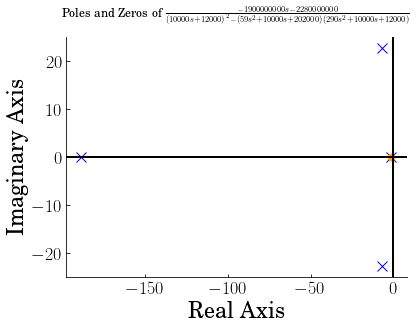

In [13]:
# Plot the poles and zeros of the TF
pole_zero_plot(TF)

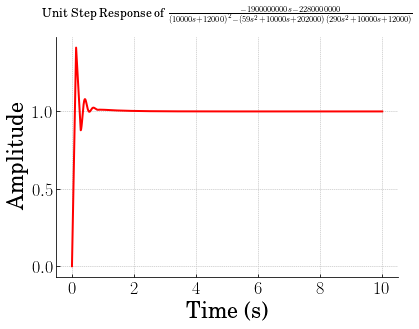

In [14]:
step_response_plot(TF,grid=False,color='r')

## Controls Package Implementation

In [25]:
# cs = 5000
# ks = 20000
cs = 10
ks = 5
kt = 190000
m1 = 290
m2 = 59

num1 = [cs, ks]
den1 = [m1, cs, ks]
G1 = control.tf(num1,den1)

num2 = [cs, ks]
den2 = [m2, cs, (ks+kt)]
G2 = control.tf(num2,den2)

num3 = [kt]
den3 = [m2, cs, (ks+kt)]
G3 = control.tf(num3,den3)

G4 = control.feedback(G1,G2,sign=1)

G = control.series(G4,G3)
G = control.minreal(G)
print(G)

2 states have been removed from the model

              111 s + 55.52
------------------------------------------
s^4 + 0.204 s^3 + 3220 s^2 + 111 s + 55.52



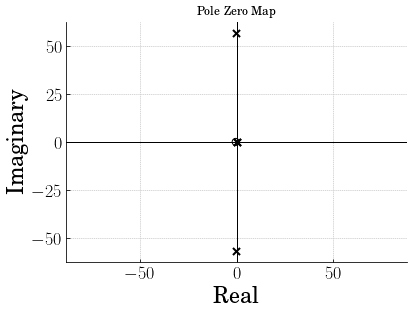

In [26]:
poles, zeros = control.pzmap(G)

In [27]:
time = np.arange(0,100,0.1) # time samples from 0 to 20 seconds with time spacing of 0.05 seconds

# t, xout = control.step_response(G,T=time)
t, xout = control.impulse_response(G,T=time)

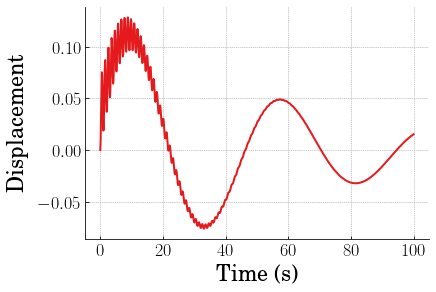

In [28]:
#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Displacement', fontsize=22, weight='bold', labelpad=10)

plt.plot(time, xout, linewidth=2, linestyle='-', label=r'Response')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

# plt.show()